In [1]:
%matplotlib inline

## Problem Statement
There is a virus spreading at the General Hospital. The hospital has an array of M x N wards, where M is
the number of rows and N the number of columns. Each ward can be empty or have multiple patients.
Each cell in the matrix can have a value of 0, 1 or 2 with the following meaning:

0. The ward is empty
1. The ward has uninfected patients
2. The ward has infected patients

The infection can spread from an infected ward to an uninfected one only up, down, left and right in the
matrix of wards during one unit of time. Empty wards cannot propagate the infection. Develop a
program to help determine the minimum units of time after which all patients will be infected at the
hospital. If all patients are not infected after an infinite amount of time, then return –1.

In [5]:
import networkx as nx
import numpy as np
import pandas as pd

## initial matrix

In [46]:
A = np.array([[2, 1, 0, 2, 1], [1, 0, 1, 2, 1], [1, 0, 0, 2, 1]])

In [47]:
A

array([[2, 1, 0, 2, 1],
       [1, 0, 1, 2, 1],
       [1, 0, 0, 2, 1]])

In [48]:
A.shape

(3, 5)

In [49]:
x,y  = A.shape
x,y

(3, 5)

## Convert to graph

In [50]:
import itertools
import time

In [51]:
virus = []
labels = {}
color_map = []
G = nx.grid_2d_graph(x,y)

for a,b in itertools.product(range(x), range(y)):
    data = A[a,b]
    coordinates = (a,b)
    
    if data == 0:
        G.remove_node(coordinates)
        
    elif data == 1:
        color_map.append('blue')
        labels[coordinates] = f'{coordinates}'
        
    else:
        color_map.append('red')
        virus.append(coordinates)
        labels[coordinates] = f'{coordinates}'

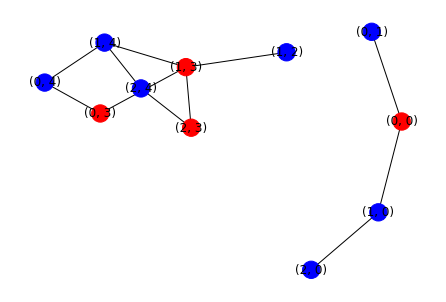

In [53]:
nx.draw(G, labels=labels,  node_color=color_map, pos=nx.spring_layout(G, iterations=20))

In [54]:
G.nodes()

NodeView(((0, 0), (0, 1), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 3), (2, 4)))

In [55]:
virus

[(0, 0), (0, 3), (1, 3), (2, 3)]

## Test 1: shortest path

In [56]:
df = pd.DataFrame(nx.floyd_warshall_numpy(G), columns=G.nodes(), index=G.nodes())

In [57]:
df

0                   1                   2          
       0    1    3    4    0    2    3    4    0    3    4
0 0  0.0  1.0  inf  inf  1.0  inf  inf  inf  2.0  inf  inf
  1  1.0  0.0  inf  inf  2.0  inf  inf  inf  3.0  inf  inf
  3  inf  inf  0.0  1.0  inf  2.0  1.0  2.0  inf  2.0  3.0
  4  inf  inf  1.0  0.0  inf  3.0  2.0  1.0  inf  3.0  2.0
1 0  1.0  2.0  inf  inf  0.0  inf  inf  inf  1.0  inf  inf
  2  inf  inf  2.0  3.0  inf  0.0  1.0  2.0  inf  2.0  3.0
  3  inf  inf  1.0  2.0  inf  1.0  0.0  1.0  inf  1.0  2.0
  4  inf  inf  2.0  1.0  inf  2.0  1.0  0.0  inf  2.0  1.0
2 0  2.0  3.0  inf  inf  1.0  inf  inf  inf  0.0  inf  inf
  3  inf  inf  2.0  3.0  inf  2.0  1.0  2.0  inf  0.0  1.0
  4  inf  inf  3.0  2.0  inf  3.0  2.0  1.0  inf  1.0  0.0

In [58]:
df.columns

MultiIndex([(0, 0),
            (0, 1),
            (0, 3),
            (0, 4),
            (1, 0),
            (1, 2),
            (1, 3),
            (1, 4),
            (2, 0),
            (2, 3),
            (2, 4)],
           )

In [59]:
df[virus].T

0                   1                   2          
       0    1    3    4    0    2    3    4    0    3    4
0 0  0.0  1.0  inf  inf  1.0  inf  inf  inf  2.0  inf  inf
  3  inf  inf  0.0  1.0  inf  2.0  1.0  2.0  inf  2.0  3.0
1 3  inf  inf  1.0  2.0  inf  1.0  0.0  1.0  inf  1.0  2.0
2 3  inf  inf  2.0  3.0  inf  2.0  1.0  2.0  inf  0.0  1.0

In [60]:
df[virus].T.min().max()

2.0

## Test 2

In [61]:
virus

[(0, 0), (0, 3), (1, 3), (2, 3)]

In [62]:
data = []
for item in virus:
    data.append(nx.shortest_path_length(G, item))

In [63]:
df = pd.DataFrame(data)
df

,"(0, 0)","(1, 0)","(0, 1)","(2, 0)","(0, 3)","(1, 3)","(0, 4)","(2, 3)","(1, 2)","(1, 4)","(2, 4)"
0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2.0,2.0,3.0
2,NaN,NaN,NaN,NaN,1.0,0.0,2.0,1.0,1.0,1.0,2.0
3,NaN,NaN,NaN,NaN,2.0,1.0,3.0,0.0,2.0,2.0,1.0


In [64]:
len(df.columns)

11

In [65]:
len(G.nodes())

11

In [66]:
df.min()

(0, 0)    0.0
(1, 0)    1.0
(0, 1)    1.0
(2, 0)    2.0
(0, 3)    0.0
(1, 3)    0.0
(0, 4)    1.0
(2, 3)    0.0
(1, 2)    1.0
(1, 4)    1.0
(2, 4)    1.0
dtype: float64

In [67]:
df.min().max()

2.0